In [1]:
# Imports and Setup
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets
from model import DynamicPricingModel, ProblemParameters
from visualization import HotelPricingVisualizer

In [2]:
#For interactive plots
%matplotlib inline

In [3]:
# Define interactive parameter adjustment
def create_visualization(N, T, C, price_min, price_max, price_levels, arrival_prob):
    """Helper function to create and display visualizations"""
    params = ProblemParameters(
        N=N, T=T, C=C,
        price_min=price_min,
        price_max=price_max,
        price_levels=price_levels,
        arrival_prob_base=arrival_prob
    )
    
    # Create and solve model
    model = DynamicPricingModel(params)
    model.solve(use_parallel=False)
    
    # Get solution data
    solution_data = model.get_solution_data()
    
    # Create visualizer and generate plots
    viz = HotelPricingVisualizer(solution_data)
    viz.plot_all()

In [4]:
# Create interactive widgets
widgets.interact(
    create_visualization,
    N=widgets.IntSlider(min=2, max=5, value=3, description='Service Days:'),
    T=widgets.IntSlider(min=1, max=5, value=2, description='Booking Periods:'),
    C=widgets.IntSlider(min=1, max=10, value=5, description='Capacity:'),
    price_min=widgets.FloatSlider(min=0, max=100, value=50, description='Min Price:'),
    price_max=widgets.FloatSlider(min=100, max=200, value=150, description='Max Price:'),
    price_levels=widgets.IntSlider(min=2, max=10, value=3, description='Price Levels:'),
    arrival_prob=widgets.FloatSlider(min=0.01, max=0.16, value=0.15, description='Arrival Prob:')
)

interactive(children=(IntSlider(value=3, description='Service Days:', max=5, min=2), IntSlider(value=2, descri…

<function __main__.create_visualization(N, T, C, price_min, price_max, price_levels, arrival_prob)>

## Basic Analysis

2024-11-29 15:01:19,066 - INFO - Starting solution process...
2024-11-29 15:01:19,066 - INFO - Processing time period 2
Processing states for t=2: 100%|████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 1751.73it/s]
2024-11-29 15:01:19,191 - INFO - Processing time period 1
Processing states for t=1: 100%|████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 1764.94it/s]
2024-11-29 15:01:19,314 - INFO - Solution completed in 0.25 seconds
2024-11-29 15:01:19,320 - ERROR - Error in 3D plotting: module 'matplotlib.cbook' has no attribute '_broadcast_with_masks'


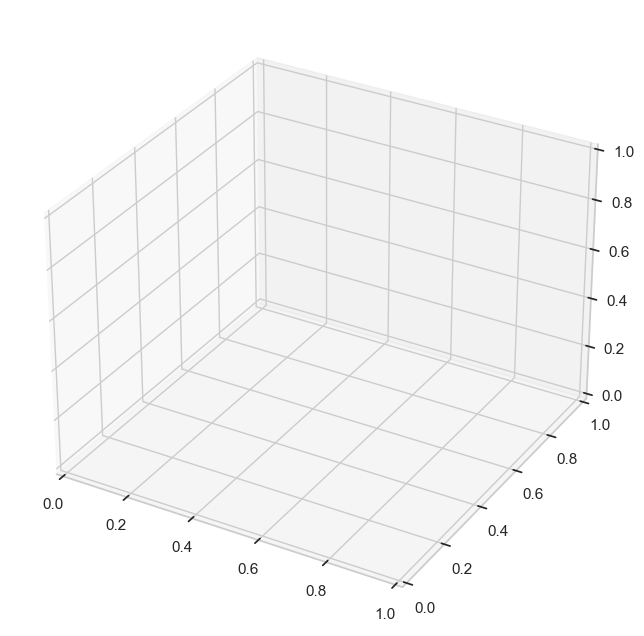

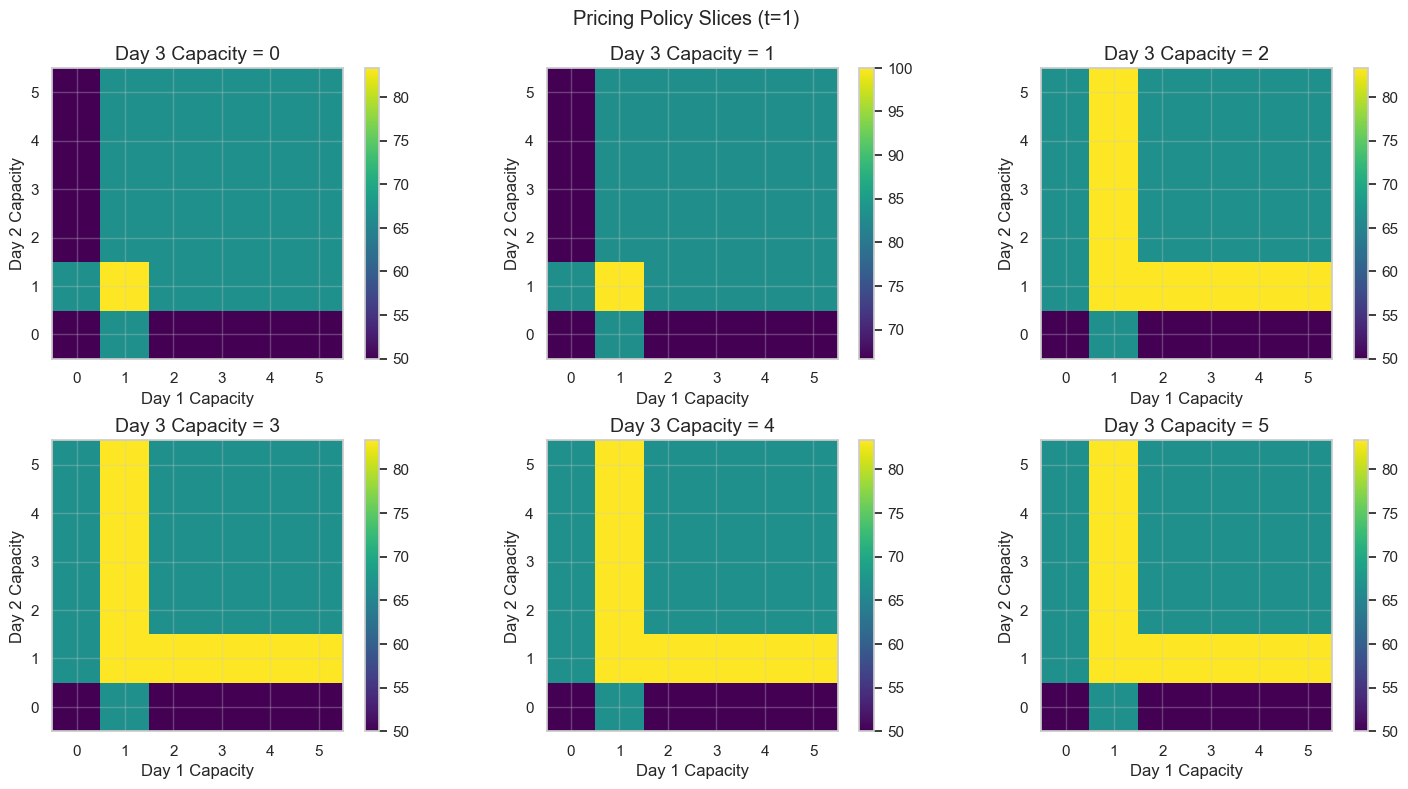

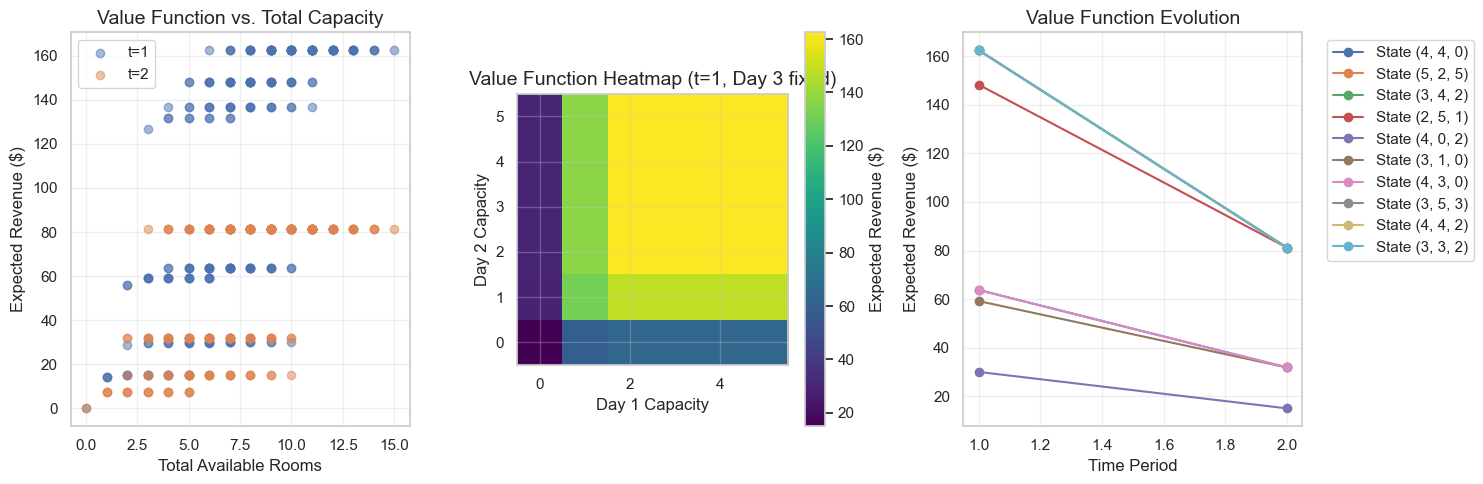

In [5]:
# Define base parameters
base_params = ProblemParameters(
    N=3, T=2, C=5,
    price_min=50.0,
    price_max=150.0,
    price_levels=3,
    arrival_prob_base=0.15
)

# Create and solve model
model = DynamicPricingModel(base_params)
model.solve(use_parallel=False)

# Create visualizer
solution_data = model.get_solution_data()
viz = HotelPricingVisualizer(solution_data)

# Generate specific visualizations
viz.plot_pricing_policy_3d()
viz.plot_value_function()

## Scenario Analysis

2024-11-29 15:01:24,235 - INFO - Starting solution process...
2024-11-29 15:01:24,238 - INFO - Processing time period 2
Processing states for t=2: 100%|████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 1477.70it/s]
2024-11-29 15:01:24,388 - INFO - Processing time period 1
Processing states for t=1: 100%|████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 1763.04it/s]
2024-11-29 15:01:24,512 - INFO - Solution completed in 0.28 seconds



Scenario 1:
Capacity: 5, Price Range: (50, 150)


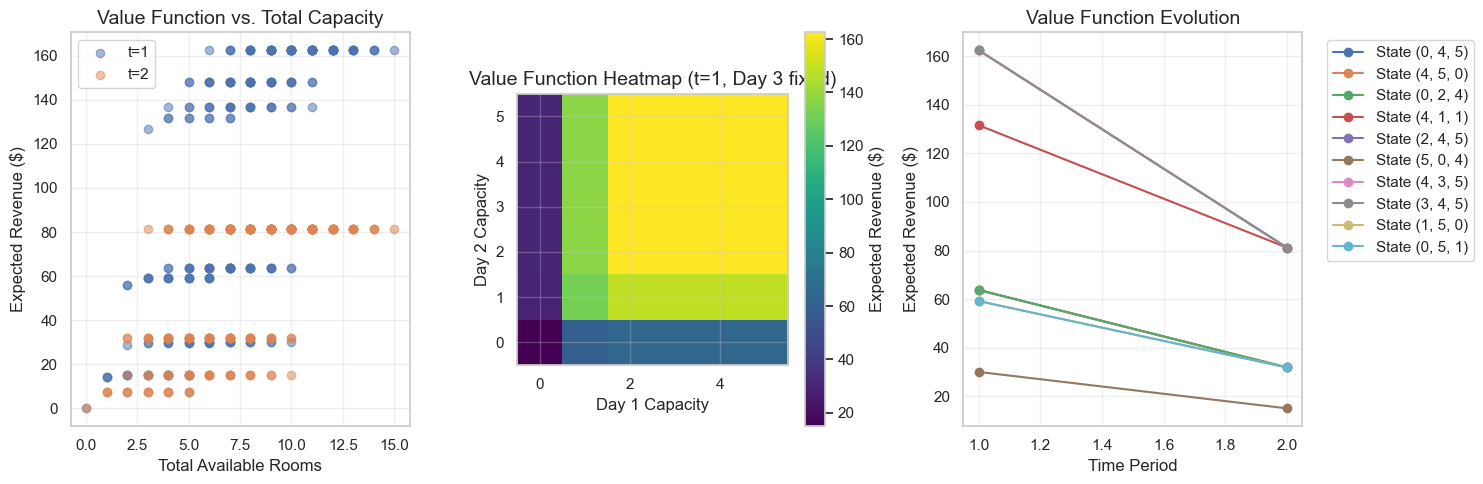

2024-11-29 15:01:24,761 - INFO - Starting solution process...
2024-11-29 15:01:24,762 - INFO - Processing time period 2
Processing states for t=2: 100%|██████████████████████████████████████████████████████████████████████████████████████| 1331/1331 [00:00<00:00, 1563.56it/s]
2024-11-29 15:01:25,614 - INFO - Processing time period 1
Processing states for t=1: 100%|██████████████████████████████████████████████████████████████████████████████████████| 1331/1331 [00:00<00:00, 1579.87it/s]
2024-11-29 15:01:26,458 - INFO - Solution completed in 1.70 seconds



Scenario 2:
Capacity: 10, Price Range: (50, 150)


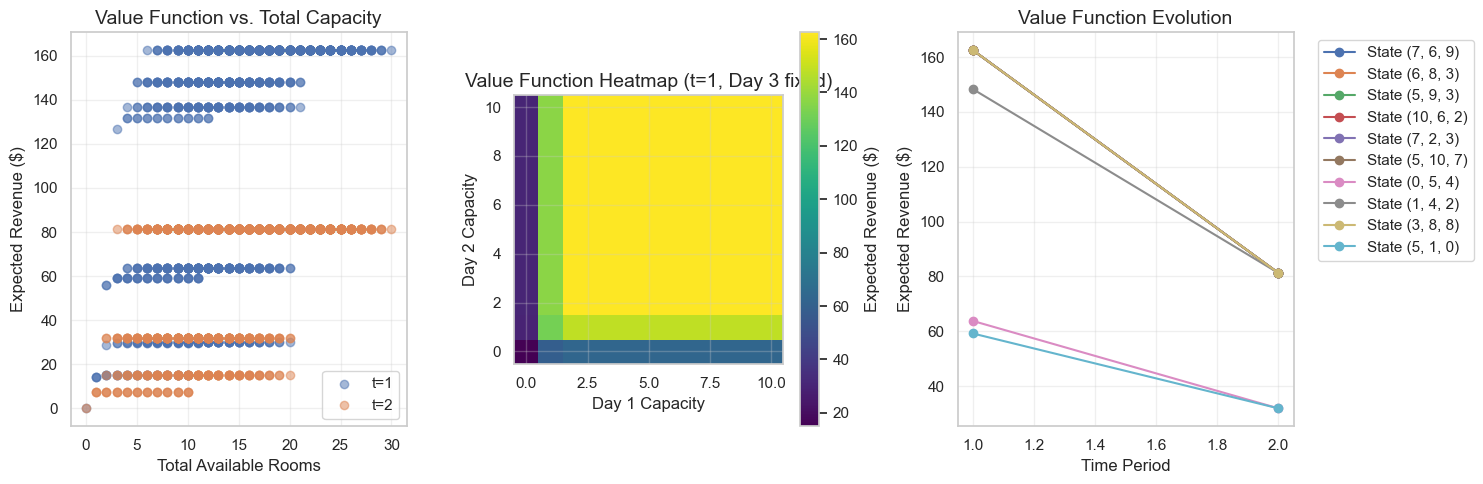

2024-11-29 15:01:26,787 - INFO - Starting solution process...
2024-11-29 15:01:26,788 - INFO - Processing time period 2
Processing states for t=2: 100%|████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 1738.15it/s]
2024-11-29 15:01:26,913 - INFO - Processing time period 1
Processing states for t=1: 100%|████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 1744.47it/s]
2024-11-29 15:01:27,038 - INFO - Solution completed in 0.25 seconds



Scenario 3:
Capacity: 5, Price Range: (75, 175)


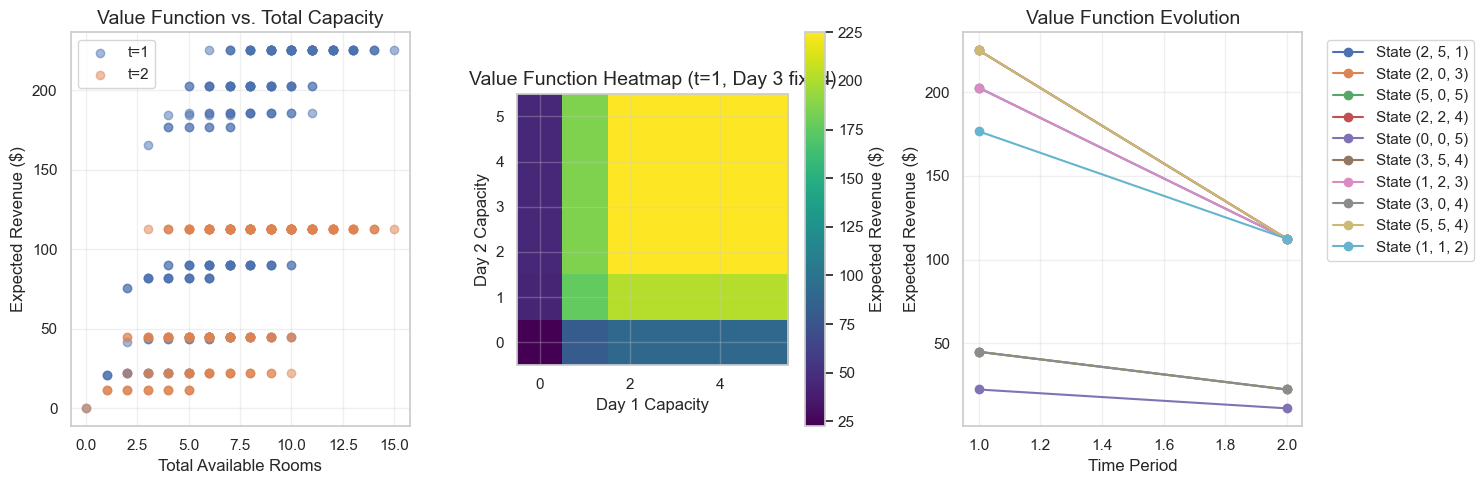

In [6]:
# Scenario analysis
def analyze_scenario(params: ProblemParameters):
    model = DynamicPricingModel(params)
    model.solve(use_parallel=False)
    return model.get_solution_data()

# Define scenarios
scenarios = [
    ProblemParameters(N=3, T=2, C=5, price_min=50, price_max=150, 
                     price_levels=3, arrival_prob_base=0.15),  # Base
    ProblemParameters(N=3, T=2, C=10, price_min=50, price_max=150, 
                     price_levels=3, arrival_prob_base=0.15),  # High capacity
    ProblemParameters(N=3, T=2, C=5, price_min=75, price_max=175, 
                     price_levels=3, arrival_prob_base=0.15),  # High prices
]

# Analyze each scenario
for i, params in enumerate(scenarios):
    solution_data = analyze_scenario(params)
    viz = HotelPricingVisualizer(solution_data)
    print(f"\nScenario {i+1}:")
    print(f"Capacity: {params.C}, Price Range: ({params.price_min}, {params.price_max})")
    viz.plot_value_function()
    plt.show()


## Save Results

In [ ]:
import pickle
import datetime

def save_results(solution_data, filename=None):
    if filename is None:
        timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f'hotel_pricing_results_{timestamp}.pkl'
    
    with open(filename, 'wb') as f:
        pickle.dump(solution_data, f)
    
    print(f'Results saved to {filename}')

# Save current results
save_results(solution_data)